# This notebook presents the topological analysis of only the signal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para el modelo de redes neuronales CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Librerias GTDA
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud
import plotly.graph_objects as go
#from nolitsa import dimension, delay #This library has some problems with the installation, is only used for looking for the parameters of the embedding

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

import math
import ripser
from persim import plot_diagrams, PersistenceImager
import gudhi

plt.rcParams.update(plt.rcParamsDefault)

In [2]:
noise_data = np.load("./data/noisy_signals.npy")
labels = np.load("./data/labels.npy")

## Generating the persistence diagram using ripser

In [3]:
x_periodic = np.linspace(0, 10, 869)
y_periodic = noise_data[1] #First signal

# The parameters of the embedding are calculated using the library nolitsa, that results on a local optimal embedding
tau=2
d=3

embedder_periodic = SingleTakensEmbedding(
parameters_type="fixed",
time_delay=tau,
dimension=d,
)
y_periodic_embedded = embedder_periodic.fit_transform(y_periodic)

ripserperiod = ripser.ripser(y_periodic_embedded)["dgms"]


## Plot the diagram

Shape of embedded time series: (8688, 3)


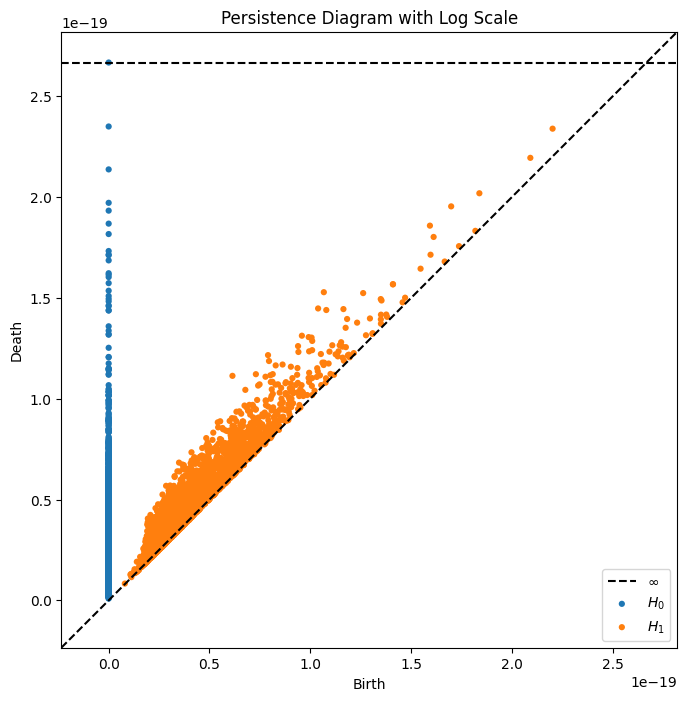

In [4]:

print(f"Shape of embedded time series: {y_periodic_embedded.shape}")
plt.figure(figsize=(8, 8))
plot_diagrams(ripserperiod)
plt.title("Persistence Diagram with Log Scale")
plt.show()

# Generating the Persistence Image of $H_{1}$

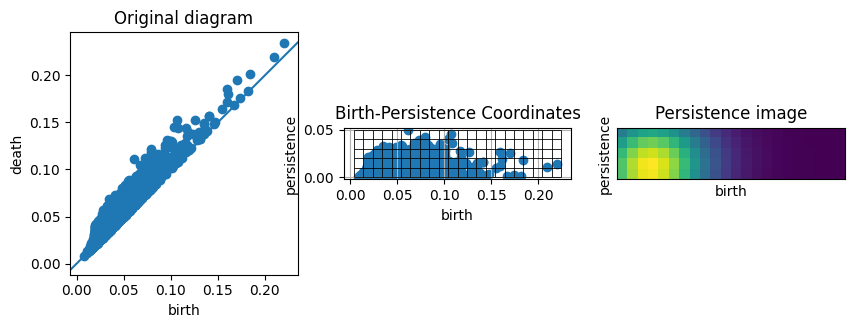

In [6]:

diagrams= ripserperiod[1].copy()
diagrams=diagrams*(1*10**18) #Change the scale of the diagrams to avoid numerical problems
pimgr = PersistenceImager(pixel_size=0.01)
pdgms = diagrams
pimgr.fit(diagrams, skew=True)
pimgr.kernel_params = {'sigma': 0.001}#0.000000001} #0.00001
pimgs = pimgr.transform(pdgms,skew=True)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].set_title('Original diagram')
pimgr.plot_diagram(pdgms, skew=False, ax=axs[0])

axs[1].set_title('Birth-Persistence Coordinates')
pimgr.plot_diagram(pdgms, skew=True, ax=axs[1])
axs[1].grid()

axs[2].set_title('Persistence image')
pimgr.plot_image(pimgs)#, ax=axs[2])
plt.show()